In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Define the file path
file_path = r'C:\Users\cyril\archive (1)\1. Weather Data.csv'
df = pd.read_csv(file_path)

In [12]:
# Get the key characteristics of the dataset
df.info()
print("\nDataset Info:")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB

Dataset Info:


In [13]:
print("\nSummary Statistics:")
display(df.describe(include='all'))


Summary Statistics:


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


In [14]:
numeric_df = df.select_dtypes(include=[np.number])


In [15]:
z_scores = (numeric_df - numeric_df.mean()) / numeric_df.std()
outliers = df[(z_scores > 3) | (z_scores < -3)].dropna(how='all')
print(outliers)


     Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
33         NaN     NaN               NaN        NaN             44.0   
34         NaN     NaN               NaN        NaN             43.0   
36         NaN     NaN               NaN        NaN             48.0   
298        NaN     NaN               NaN        NaN              NaN   
299        NaN     NaN               NaN        NaN              NaN   
...        ...     ...               ...        ...              ...   
8552       NaN     NaN               NaN        NaN              NaN   
8669       NaN     NaN               NaN        NaN             43.0   
8671       NaN     NaN               NaN        NaN             44.0   
8677       NaN     NaN               NaN        NaN             48.0   
8678       NaN     NaN               NaN        NaN             46.0   

      Visibility_km  Press_kPa Weather  
33              NaN        NaN     NaN  
34              NaN        NaN     NaN  
36          

In [16]:
columns_of_interest = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']


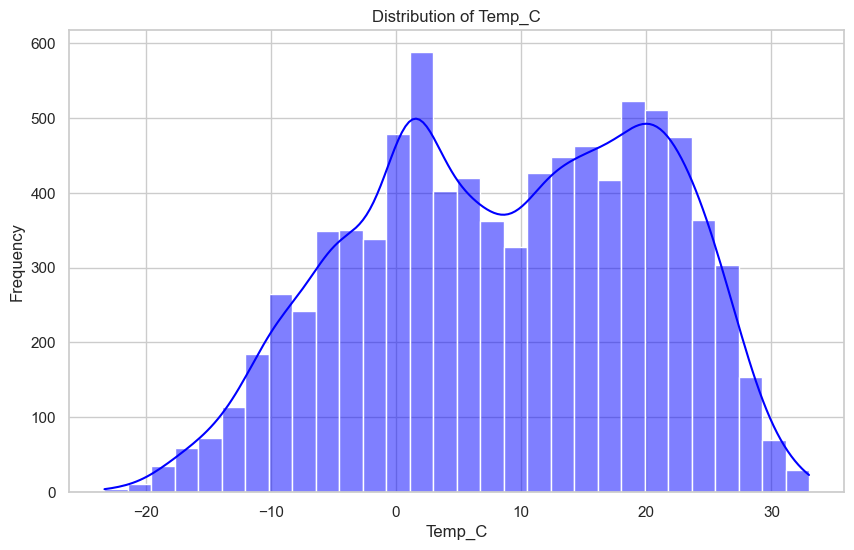

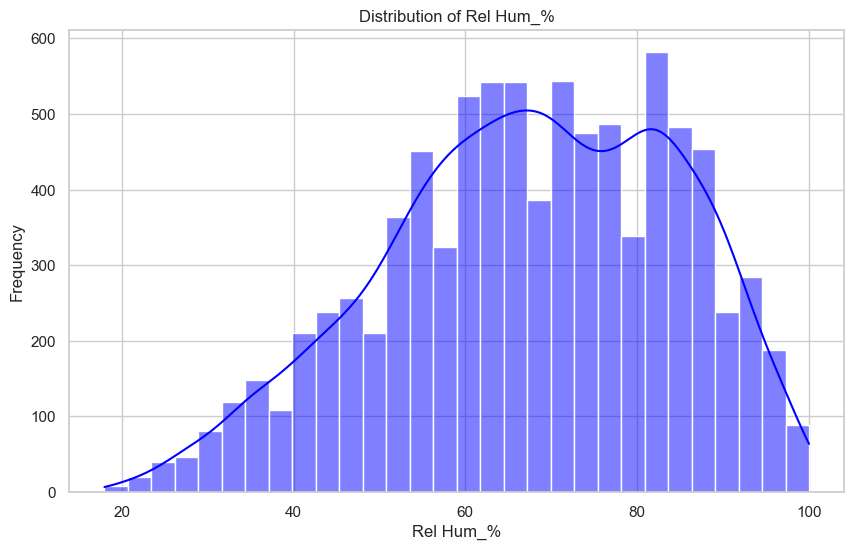

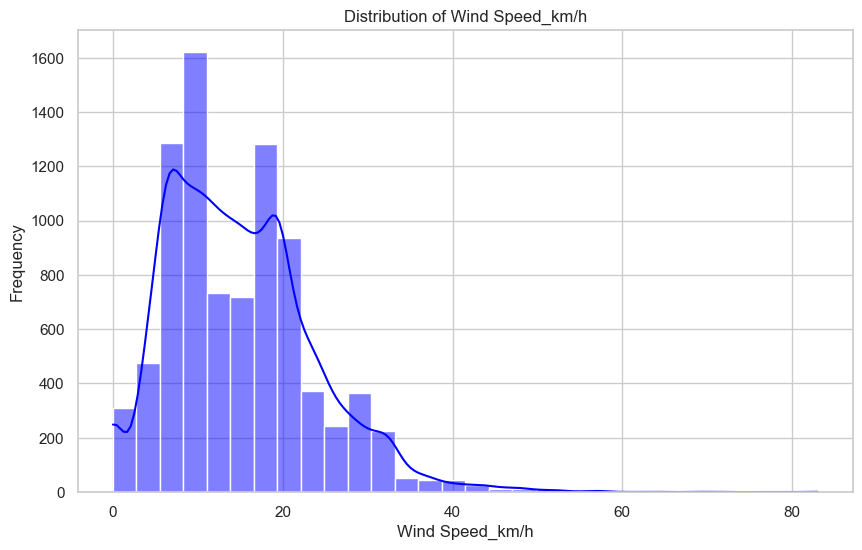

In [17]:
#  histograms for each column for the weather parameters
for column in columns_of_interest:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Figure size 1400x800 with 0 Axes>

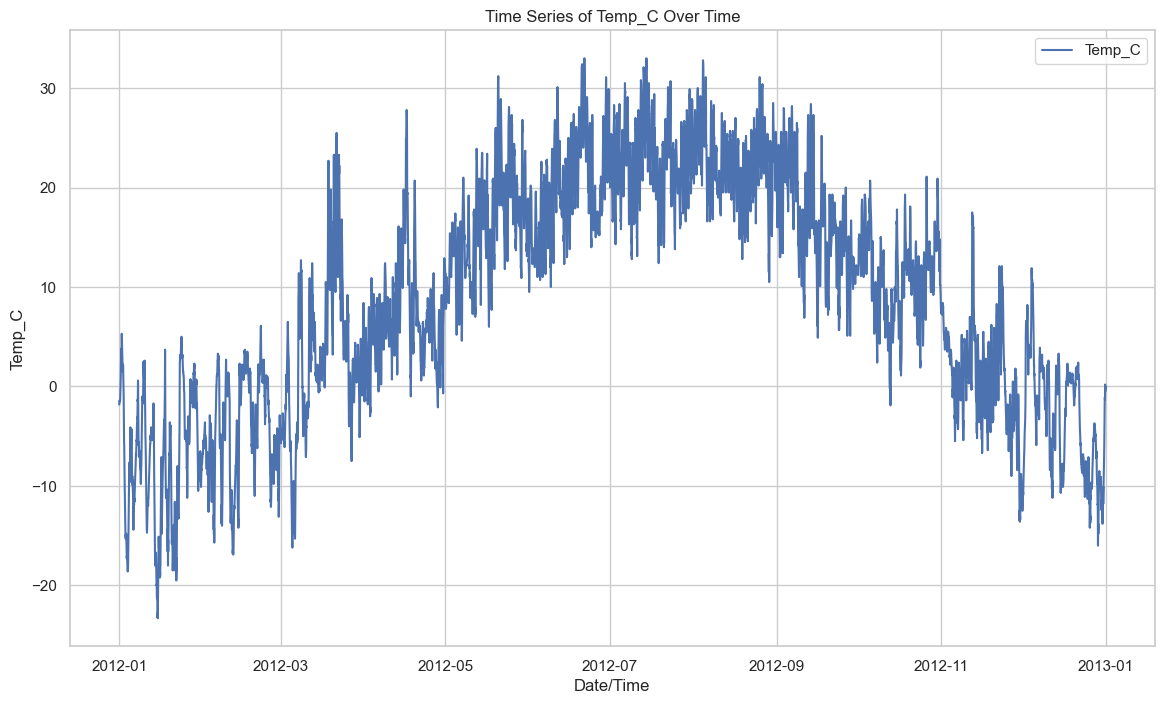

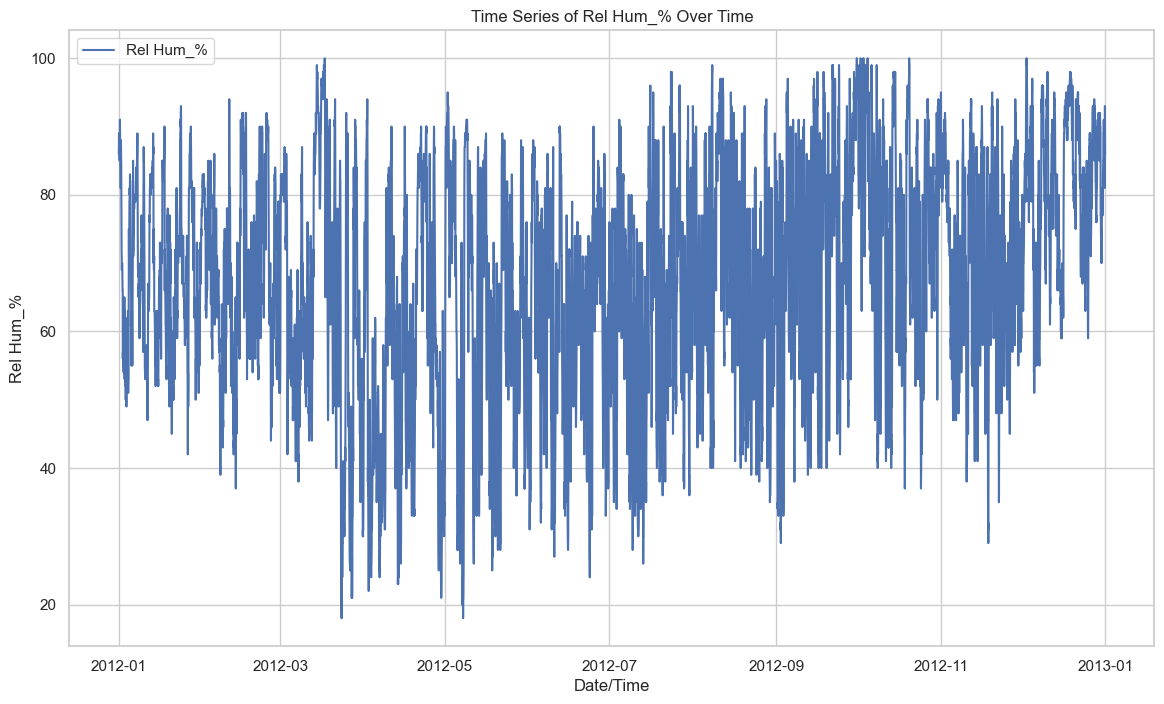

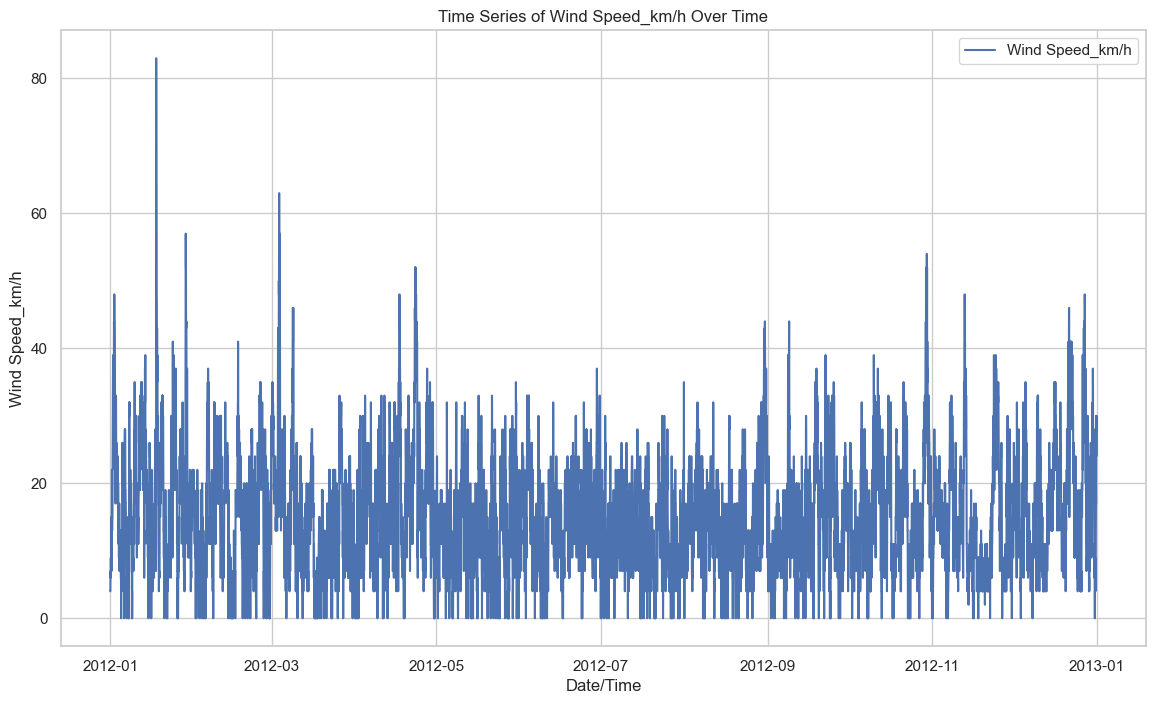

In [18]:
# Convert the 'Date/Time' column to datetime format
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Set the 'Date/Time' column as the index
df.set_index('Date/Time', inplace=True)

# Plot time series for key weather parameters
columns_of_interest = ['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']

# Set the plot size and style
plt.figure(figsize=(14, 8))
sns.set(style='whitegrid')

for column in columns_of_interest:
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df[column], label=column)
    plt.title(f'Time Series of {column} Over Time')
    plt.xlabel('Date/Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    



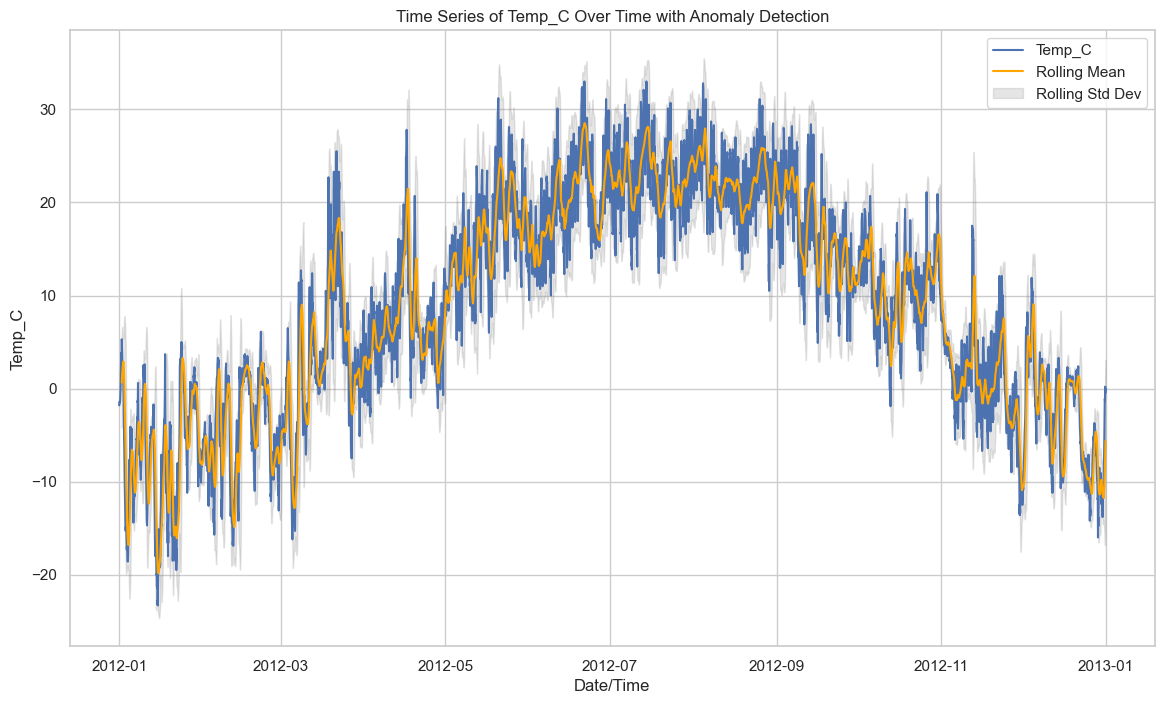

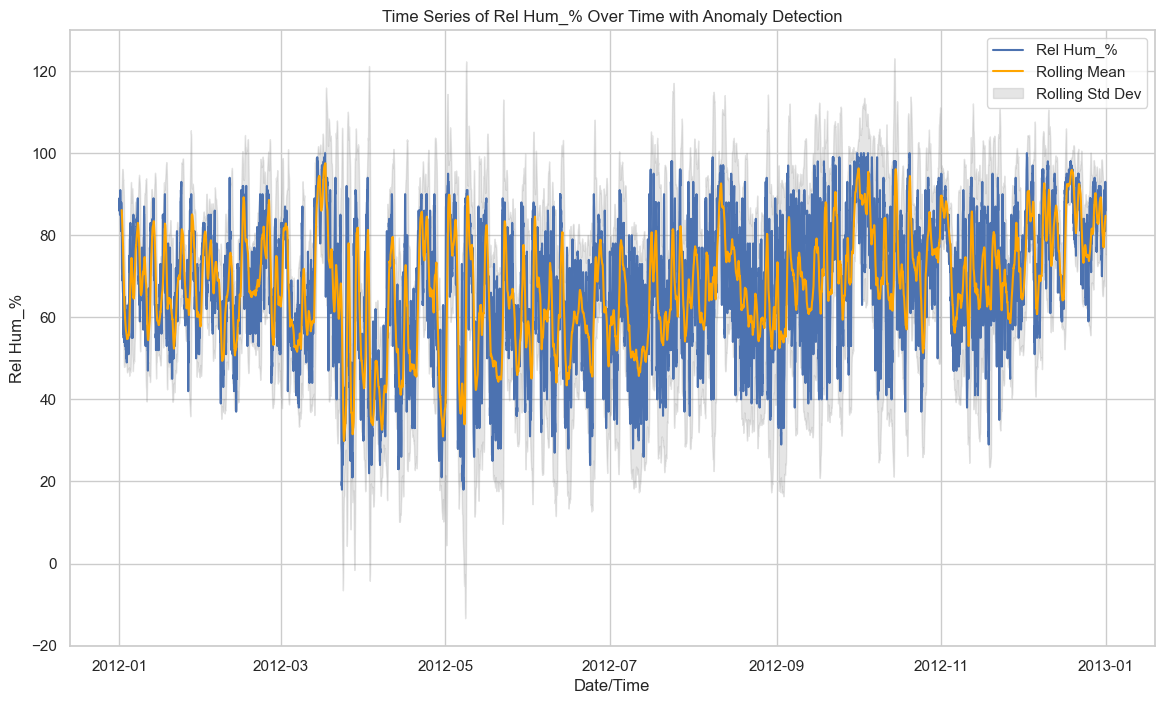

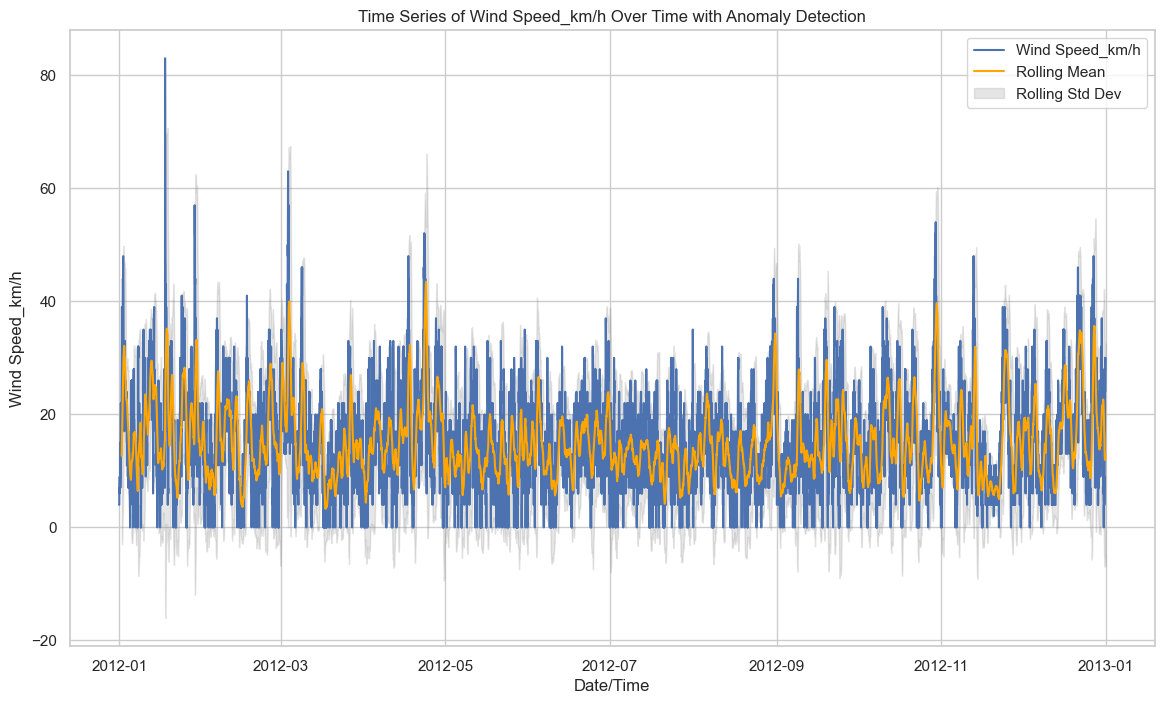

Anomalies detected in Wind Speed_km/h:
                      Z-Score  Wind Speed_km/h
Date/Time                                     
2012-01-02 09:00:00  3.343946               44
2012-01-02 10:00:00  3.228854               43
2012-01-02 12:00:00  3.804314               48
2012-01-18 01:00:00  7.832537               83
2012-01-18 02:00:00  6.336340               70
...                       ...              ...
2012-12-21 18:00:00  3.574130               46
2012-12-27 05:00:00  3.228854               43
2012-12-27 07:00:00  3.343946               44
2012-12-27 13:00:00  3.804314               48
2012-12-27 14:00:00  3.574130               46

[71 rows x 2 columns]




In [20]:
# Plot and analyze anomalies for each column
for column in columns_of_interest:
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df[column], label=column)
    plt.title(f'Time Series of {column} Over Time with Anomaly Detection')
    plt.xlabel('Date/Time')
    plt.ylabel(column)
    plt.legend()

    # Calculate rolling mean and standard deviation
    rolling_mean = df[column].rolling(window=24).mean()
    rolling_std = df[column].rolling(window=24).std()
    
    # Plot rolling mean and rolling std
    plt.plot(df.index, rolling_mean, color='orange', label='Rolling Mean')
    plt.fill_between(df.index, rolling_mean - (2 * rolling_std), rolling_mean + (2 * rolling_std), color='gray', alpha=0.2, label='Rolling Std Dev')
    
    plt.legend()
    plt.show()

    # Calculate Z-scores to detect anomalies
    df['Z-Score'] = (df[column] - df[column].mean()) / df[column].std()
    anomalies = df[np.abs(df['Z-Score']) > 3]

    if not anomalies.empty:
        print(f"Anomalies detected in {column}:")
        print(anomalies[['Z-Score', column]])
        print("\n")


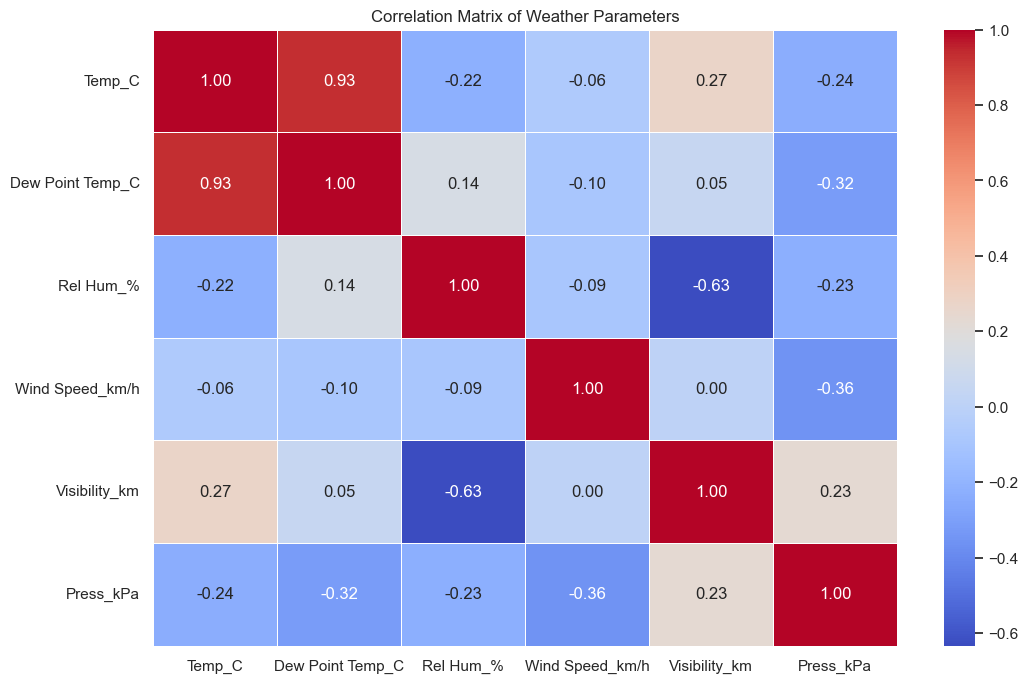

In [41]:
# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

In [45]:

# Extract month and season
df['Month'] = df['Date/Time'].dt.month
df['Season'] = df['Date/Time'].dt.month % 12 // 3 + 1

# Define seasons
seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(seasons)

# Calculate average temperature and humidity by month and season
monthly_avg = df.groupby('Month').agg({'Temp_C': 'mean', 'Rel Hum_%': 'mean'})
seasonal_avg = df.groupby('Season').agg({'Temp_C': 'mean', 'Rel Hum_%': 'mean'})

# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(monthly_avg.index, monthly_avg['Temp_C'], label='Temp_C')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Temperature')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(monthly_avg.index, monthly_avg['Rel Hum_%'], label='Rel Hum_%', color='orange')
plt.xlabel('Month')
plt.ylabel('Average Humidity (%)')
plt.title('Average Monthly Humidity')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot seasonal trends
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(seasonal_avg.index, seasonal_avg['Temp_C'])
plt.xlabel('Season')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Seasonal Temperature')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(seasonal_avg.index, seasonal_avg['Rel Hum_%'], color='orange')
plt.xlabel('Season')
plt.ylabel('Average Humidity (%)')
plt.title('Average Seasonal Humidity')
plt.grid(True)

plt.tight_layout()
plt.show()



KeyError: 'Date/Time'

In [43]:
correlation = df[['Temp_C', 'Rel Hum_%']].corr().iloc[0, 1]

In [44]:
print(f'Correlation between temperature and humidity: {correlation:.2f}')


Correlation between temperature and humidity: -0.22


In [ ]:
# Identify missing or null values
missing_values = df.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values)

In [5]:
# Handling missing values using mean for numerical columns and mode for categorical columns
for column in df.columns:
    if df[column].dtype == 'object': 
        df[column].fillna(df[column].mode()[0], inplace=True)
    else: 
        df[column].fillna(df[column].mean(), inplace=True)

# Verify if missing values are handled
print("\nMissing Values after handling:")
print(df.isnull().sum())

# Display the cleaned dataset info
print("\nCleaned Dataset Info:")
df.info()


Missing Values after handling:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
# Check for and address any duplicate records
duplicates = df.duplicated().sum()
print("\nNumber of duplicate records:")
print(duplicates)

# Removing duplicate records
df.drop_duplicates(inplace=True)

# Verify if duplicates are handled
print("\nNumber of duplicate records after removing:")
print(df.duplicated().sum())



Number of duplicate records:
0

Number of duplicate records after removing:
0


In [9]:
summary = weather_data.describe()
print(summary)



NameError: name 'weather_data' is not defined